<a href="https://colab.research.google.com/github/sakshitiwari1234/SKLEARN_PYTHON/blob/main/Function_Transformer_In_SKLEARN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

willl be contnuing more feature engineering techniques in this notebook.

## Function Transoformer


it is a feature transoforming technique , same as feature scaling , collumn tranforming technique , same in this , it is also used in some cases which is suitable for processing.

Function Transformer are of three types ->

LOG T
Reciprocal
Sq/ Sq root


In [1]:
import numpy as np
import pandas as pd

import scipy.stats as stats    # to plot Q-Q plot
import matplotlib.pyplot as plt
import seaborn as sns         # to plot Dist plot

from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/content/train.csv", usecols=['PassengerId', "Age" ,"Fare"])

In [3]:
df

,PassengerId,Age,Fare
0,1,22.0,7.2500
1,2,38.0,71.2833
2,3,26.0,7.9250
3,4,35.0,53.1000
4,5,35.0,8.0500
...,...,...,...
886,887,27.0,13.0000
887,888,19.0,30.0000
888,889,NaN,23.4500
889,890,26.0,30.0000


In [4]:
df.value_counts()

,,,count
PassengerId,Age,Fare,
891,32.0,7.7500,1
1,22.0,7.2500,1
2,38.0,71.2833,1
3,26.0,7.9250,1
4,35.0,53.1000,1
...,...,...,...
16,55.0,16.0000,1
15,14.0,7.8542,1
14,39.0,31.2750,1


In [5]:
df.describe()

,PassengerId,Age,Fare
count,891.000000,714.000000,891.000000
mean,446.000000,29.699118,32.204208
std,257.353842,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,223.500000,20.125000,7.910400
50%,446.000000,28.000000,14.454200
75%,668.500000,38.000000,31.000000
max,891.000000,80.000000,512.329200


In [6]:
df.shape

(891, 3)

In [7]:
df.isnull().sum()

,0
PassengerId,0
Age,177
Fare,0


In [8]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

<ipython-input-8-5a433634f86f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)


In [9]:
df.isnull().sum()

,0
PassengerId,0
Age,0
Fare,0


In [10]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [11]:
x

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [12]:
y

,PassengerId
0,1
1,2
2,3
3,4
4,5
...,...
886,887
887,888
888,889
889,890


In [20]:
xtrain , xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

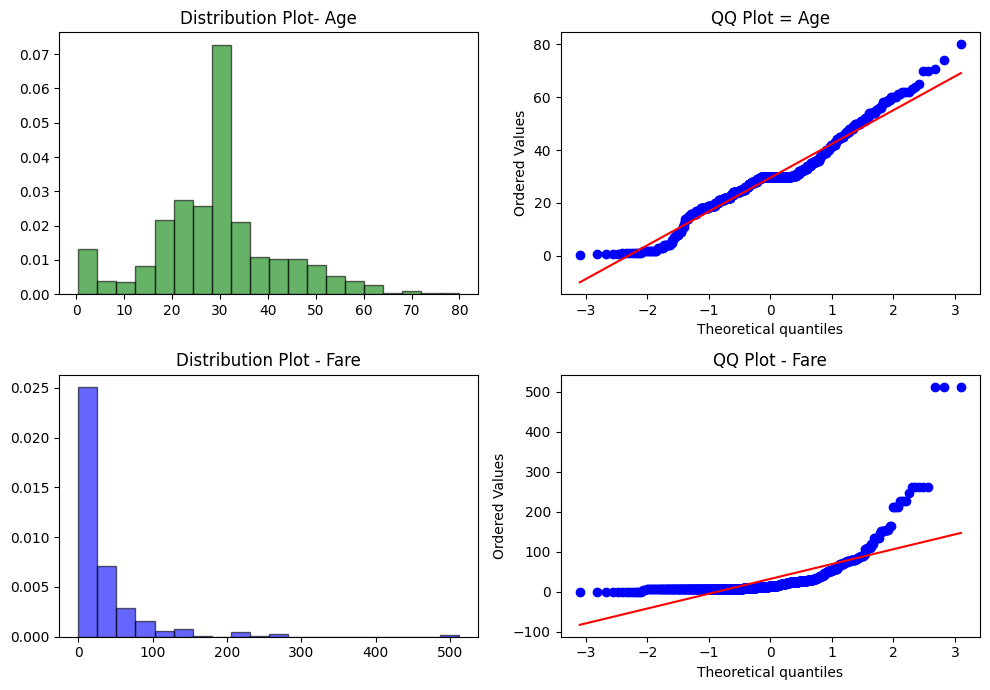

In [21]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# creating subplot with 2 rows and 2 columns

fig , axs = plt.subplots(2, 2, figsize=(10,7))



# plotting first distribution plot for age.
axs[0,0].hist(xtrain['Age'], bins= 20, density = True, alpha = 0.6, color='g', edgecolor = 'black')
axs[0,0].set_title('Distribution Plot- Age')

# now plotting first Q-Q plot for age.
stats.probplot(xtrain['Age'], dist = 'norm', plot = axs[0,1] )
axs[0, 1].set_title('QQ Plot = Age')


# plot the second distribution plot for more
axs[1,0].hist(xtrain['Fare'], bins =20, density = True, alpha = 0.6, color = 'b', edgecolor = 'black')
axs[1,0].set_title('Distribution Plot - Fare')

# Plotting second QQ Plot for Fare
stats.probplot(xtrain['Fare'],dist= 'norm', plot = axs[1,1])
axs[1,1].set_title('QQ Plot - Fare')

plt.tight_layout()
plt.show()



Training modsl before funvtion transformer

In [25]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(xtrain , ytrain)
clf2.fit(xtrain, ytrain)

y_pred = clf.predict(xtest)
y_pred1 = clf2.predict(xtest)

print("Accuracy LR", accuracy_score(ytest, y_pred))
print("Accuracy DT", accuracy_score(ytest, y_pred1))






Accuracy LR 0.0
Accuracy DT 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Log Transformer

In [26]:
trf = FunctionTransformer(func = np.log1p)
xtrain_trf = trf.fit_transform(xtrain)
xtest_trf = trf.transform(xtest)




In [27]:
clf.fit(xtrain_trf , ytrain)
clf2.fit(xtrain_trf, ytrain)

y_pred = clf.predict(xtest_trf)
y_pred1 = clf2.predict(xtest_trf)



In [29]:
print(accuracy_score(ytest, y_pred))
print(accuracy_score(ytest, y_pred1))

0.0
0.0
